# Introduction to Scientific Computation

**Scientific Computation** (Scientific Computing, Computational science)

"*Scientific Computing is the collection of tools, techniques, and theories required to solve on a computer mathematical models of problems in Science and Engineering*" {cite}`GolubOrtega2014`.

As such Scientific Computing covers a wide range of topics and fields
and if you ask 10 different domain experts to define the term *Scientifc
Computing*, you will probably get 15 different answers.

This is in a way also reflected in the editorial comments for the
[Wiki article on Computational Science](https://en.wikipedia.org/wiki/Computational_science).

Nevertheless, Scientific Computing is considered the third pillar of science, the others being **Experiments** and **Theory**.

![Three pillar of science](science-pillars.png)

There a lot science disciplines employing the scientific computing for scientific discoveries, e.g.

* Global ocean/climate modeling
* Computational fluid dynamics
* Seismology
* Biophysics
* Population dynamics (e.g.disease spreading)
* Economics
* Medical imaging
* Material science

**Challenge:**
Find me a scientific discipline where no computational methods are employed!

The covid 19 pandemicwas a very good example of a typical science problem
involving Scientific Computing, which typically consist  of the following steps.

1. Mathematical Modeling
2. Analysis of the mathematical model (Existence, Uniqueness, Continuity)
3. Numerical methods (computational complexity, stability, accuracy)
4. Realization (implemententation) 
5. Postprocessing 
6. Validation

This semester, we will learn about methods which helps you to e.g. 

* model and predict the spreading of diseases like Covid 19
* simulate the generation of patterns in biology
* understand how images are compressed

<!-- ```{image} sihr_sim_results.png
:alt: SIHR simulation results
:class: bg-primary mb-1
:width: 600px
:align: center
``` -->
![SIHR simulation](sihr_sim_results.png)

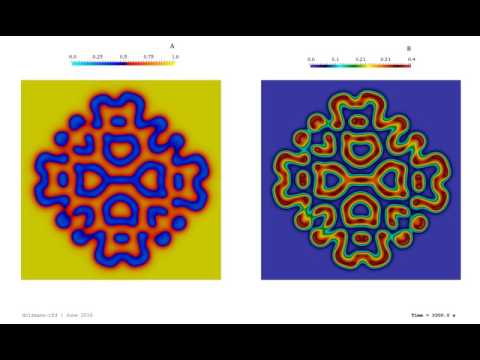

In [1]:
from IPython.display import YouTubeVideo, HTML
YouTubeVideo('nw2bPnhtxN8', width=800, height=500)

In general, we can think of Scientific as an interdisplinary, computational based approach towards scientific discovery:

<!-- ```{image} venn_diagram_scientific_computing.png
:alt: Three pillars of Scientific Computing
:class: bg-primary mb-1
:width: 800px
:align: center
``` -->
![Three pillars of Scientific Computing](venn_diagram_scientific_computing.png)

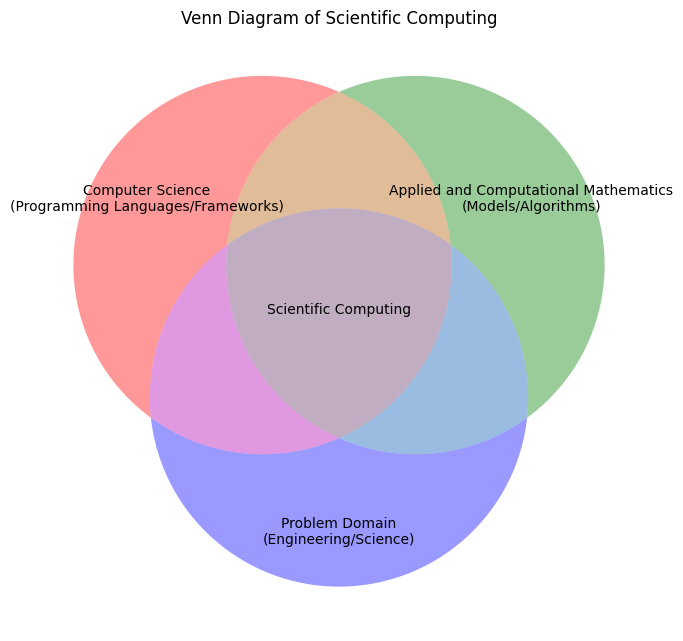

In [4]:
# The figure was generated by the following code

import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Define the labels for the Venn diagram
labels = {
    '100': 'Computer Science\n(Programming Languages/Frameworks)',
    '010': 'Applied and Computational Mathematics\n(Models/Algorithms)',
    '001': 'Problem Domain\n(Engineering/Science)',
    '110': '',
    '101': '',
    '011': '',
    '111': 'Scientific Computing'
}

# Create the Venn diagram
plt.figure(figsize=(8, 8))
venn = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), 
               # set_labels=('Computer Science', 'Applied and Computational Mathematics', 'Problem Domain')
               set_labels=('', '', '')
            )
# Update the labels
for idx, label in labels.items():
   venn.get_label_by_id(idx).set_text(label)

# Display the plot
plt.title("Venn Diagram of Scientific Computing")
plt.show()

__Mentimeter time__:

Please go to [](https://www.menti.com) and enter the following code **7381 6459**

## <font color='LightSkyBlue'>Machine Representation of Numbers</font>


Today we will talk about one important and unavoidable source of errors,
namely the way, a computer deals with numbers.

Let's start with two simple tests. 
* Define two numbers $a=0.2$ and $b=0.2$ and test whether their sum is equal to $0.4$.
* Now define two numbers $a=0.2$ and $b=0.1$ and test whether their sum is equal to $0.3$.

In [7]:
# Write your code here
a = 0.2
b = 0.1
sum = 0.3

if (a+b) == sum:
    print("That is what I expected!!")
else:
    print("What the hell is going on??")

diff = a+b
diff = diff - sum
print(f"{diff}")

What the hell is going on??
5.551115123125783e-17


<font color='green'>0.1 + 0.2 er ikke lik 0.3, mens 0.2+0.2=0.4</font>

Why is that? The reason is the way numbers are represent on a computer, which will
be the topic of the first part of the lecture.

After the lecture I recommed you to take a look 
[](https://0.30000000000000004.com) which discusses the phenomena we just observed in some detail.

### Positional System

On everyday base, we represent numbers using the __positional system__. For instance, when we write $1234.987$ to denote the number

$$ 
1234.987 = 1 \cdot 10^{3} + 2\cdot 10^2 + 3 \cdot 10^1 + 4 \cdot 10^0 
+ 9 \cdot 10^{-1} + 8 \cdot 10^{-2} + 7 \cdot 10^{-3}
$$

using $10$ as __base__. This is also known a __decimal system__.

$\mathbb{N}$ <font color='green'>er {1,2,3,4,5,...}</font>

In general for any $\beta \in \mathbb{N}$, $\beta \geqslant 2$, we use
the __positional representation__
$$
x_{\beta} = (-1)^s [ a_n a_{n-1}\ldots a_0.a_{-1}a_{-2}\ldots a_{-m} ]_{\beta}
$$

with $a_n \neq 0$ to represent the number 

<font color='LightSkyBlue'>

$$
x_{\beta} = \sum_{k=-m}^n a_k \beta^{k}. 
$$

</font>

<font color='green'>selve tallet er </font> $x_{\beta}$

Here,
* $\beta$ is called the __base__
* $a_k \in [0, \beta-1]$ are called the __digits__
* $s \in \{0,1\}$ defines the __sign__
* $a_n a_{n-1}\ldots a_0$ is the __integer__ part
* $a_{-1}a_{-2}\ldots a_{-m}$ is called the __fractional__ part
* The point between $a_0$ and $a_{-1}$ is generally called the __radix point__ <font color='green'>og skiller integer parten fra fracitonal parten </font>

Oppgave

Write down the position representation of the number $3 + \frac{2}{3}$ for
both the base $\beta=10$ and $\beta=3$.

Løsning

* $\beta = 10: \:\: [3.666666666\cdots]_{10}$
* $\beta = 3: \:\: 1 \cdot 3^{1} + 0 \cdot 3^{0} + 2 \cdot 3^{-1} = [10.2]_{3}$


To represent numbers on a computer, the most common bases are 
* $\beta = 2$ (binary),
* $\beta=10$ (decimal)
* $\beta = 16$ (hexidecimal). 

For the latter one, one uses $1,2,\ldots, 9$, A,B,C,D,E,F to represent the digits.
For $\beta = 2, 10, 16$, the point is called the binary point, decimal point and hexadecimal point, respectively.

We have already seen that for many (actuall most!) numbers, the fractional part can be infinitely long in order to represent the number exactly. But on a computer, only a finite amount of storage is available, so to represent numbers, only a fixed numbers of digits can be kept in storage for each number we wish to represent.

This will of course automatically introduces errors whenever our number can not represented exactly by
the finite number of digits available.

### Fix-point system (fasttall system) <font color='green'> (i motsetning til flyttall) </font>

Use $N=n+1+m$ digits/memory locations to store the number $x$ written as above. <font color='green'> dette er fordi vi har n+1 tall foran punktet og m punkt bak.</font>
Since the binary/decimal point is _fixed_ , it is difficult to represent large numbers $\geqslant \beta^{n+1}$ <font color='green'> (overflow) </font> or small numbers $ < \beta^{-m}$ <font color='green'> (underflow) </font>.

E.g. nowdays we often use 16 (decimal) digits in a computer, if you distributed that evenly 
to present same number of digits before and after the decimal point, the range or representable numbers is between
$10^8$ and $10^{-8}$ __This is very inconvenient__! 

Also, small numbers which are located
towards the lower end of this range cannot be as accuractely represented as number close
to the upper end of this range.

As a remedy, an modified representation system for numbers was introduced, known as __normalized floating point system__.

### Normalized floating point system (flyttall system)

Returning to our first example: 
$$
145397.2346 
= 0.1453972346 \cdot 10^{6}
= 1453972346 \cdot 10^{6-10}
$$

<font color='LightSkyBlue'>

In general we write
$$
x = (-1)^s 0.a_1 a_2 \ldots a_t \beta^e 
  = (-1)^s \cdot m \cdot \beta^{e - t} 
$$

</font>

Here,
* $t \in \mathbb{N}$ is the number of __significant digits__  (__gjeldene siffre__)
* $e$ is an integer called the __exponent__ (__eksponent__)
* $m = a_1 a_2 \ldots a_t \in \mathbb{N}$ is known as the _mantissa_. (_mantisse_)

* Exponent $e$ defines the _scale_ of the represented number,
  typically, $e \in \{e_{\mathrm{min}}, \ldots, e_{\mathrm{max}}\}$,
  with $e_{\mathrm{min}} < 0$ and $e_{\mathrm{max}} > 0$.
* Number of significant digits $t$ defines the __relative accuracy__ (__relativ nøyaktighet__).

<font color='red'> We define the __finite__ set of available __floating point numbers__

$$
\mathbb{F}(\beta,t, e_{\mathrm{min}}, e_{\mathrm{max}})
 = \{0 \} \cup \left\{  x \in \mathbb{R}: x = (-1)^s\beta^e \sum_{i=1}^t a_i \beta^{-i}, e_{\mathrm{min}} \leqslant e \leqslant e_{\mathrm{max}}, 0 \leqslant a_i \leqslant \beta - 1  \right\}
$$       

* Typically to enforce a unique representation and to ensure maximal relative accuracy, one requires that $a_1 \neq 0$ for non-zero numbers. </font>

<font color='red'> Oppgave

What is the smallest (non-zero!) and the largest number you can represent with $\mathbb{F}$?  </font>

<font color='red'> Løsning

$$
\beta^{e_{\mathrm{min}}-1} 
\leqslant |x| 
\leqslant \beta^{e_{\mathrm{max}}}(1-\beta^{-t})
\quad\text{for } x \in \mathbb{F}.
$$
</font>

__Conclusion:__

* Every number $x$ satifying $\beta^{e_{\mathrm{min}}-1} 
\leqslant |x| 
\leqslant \beta^{e_{\mathrm{max}}}(1-\beta^{-t})$ but which is __not__ in $\mathbb{F}$
can be represented by a floating point number $\mathrm{fl}(x)$ by rounding off to the closest number in $\mathbb{F}$.

<font color='LightSkyBlue'>

* Relative _machine precision_ is 
$$
\dfrac{|x-\mathrm{fl}(x)|}{|x|} \leqslant \epsilon := \frac{\beta^{1-t}}{2}
$$

</font>

* $|x| < \beta^{e_{\mathrm{min}}-1}$ leads to __underflow__.
* $|x| > \beta^{e_{\mathrm{max}}}(1-\beta^{-t})$ leads to __overflow__.

Standard machine presentations nowadays using
* Single precision, allowing for 7-8 sigificant digits
* Double precision, allowing for 16 sigificant digits

### Things we don't discuss in this but which are important in numerical mathematics

We see that already by entering data from our model into the computer, we make an unavoidable error.
The same also applied for the realization of basics mathematical operations $\{+, -, \cdot, /\}$ etc. on a computer.

Thus it is of importance to understand how errors made in a numerical method are propagated through the numerical algorithms. Keywords for the interested are
* Forward propagation: How does an initial error and the algorithm affect the final solution?
* Backward propagation: If I have certain error in my final solution, how large was the initial error?